# Importing libraries


In [402]:
#Data processing and pre-processing
import pandas as pd
import numpy as np
from skimpy import skim

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Data sampling 
from imblearn.over_sampling import SMOTE

#Data normalization
from sklearn.preprocessing import StandardScaler

#Model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,precision_score,recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

#Hypertuning
from sklearn.model_selection import RandomizedSearchCV

#Data validation
from sklearn.model_selection import validation_curve
from sklearn.metrics import log_loss

#Saving the deployment file
import pickle

# Importing Data

In [403]:
#Importing data
# Loading the CSV file and specifying path where it is stored
file_path = r'C:\Users\hp\Documents\Degree\Year 3\FYP\Dataset 2\heart_disease_health_indicators_BRFSS2015.csv'
data3 = pd.read_csv(file_path)

# Setting an option to show all records
pd.set_option('display.max_columns', None)

# Printing the data
print(data3)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0          0.0       

# EDA Exploratory data analysis and  Data pre processing

In [404]:
# Checking catergorical and numerical data
cat_cols = data3.select_dtypes(include=['object']).columns
num_cols = data3.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [405]:
# Checking data types
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [406]:
#Checking Uniques values 
data3.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [407]:
#Checking missing values
data3.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [408]:
# Checking Duplicates
duplicates_values = data3[data3.duplicated()]
print("Number of duplicates:")
print(duplicates_values)

Number of duplicates:
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
1242                     0.0     1.0       1.0        1.0  27.0     1.0   
1563                     0.0     0.0       0.0        1.0  21.0     1.0   
2700                     0.0     0.0       0.0        1.0  32.0     0.0   
3160                     0.0     0.0       0.0        1.0  21.0     0.0   
3332                     0.0     0.0       0.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253492                   0.0     1.0       1.0        1.0  33.0     0.0   
253550                   0.0     0.0       0.0        1.0  25.0     0.0   
253563                   0.0     0.0       1.0        1.0  24.0     1.0   
253597                   0.0     0.0       0.0        1.0  24.0     0.0   
253638                   0.0     0.0       0.0        1.0  24.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \

In [409]:
# Descriptive statistics
from skimpy import skim
skim(data3)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 253680 │ │ float64     │ 22    │                                                          │
│ │ Number of columns │ 22     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA   ┃ NA %    ┃ mean     ┃ sd     ┃ p0   ┃ p25   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ HeartDiseaseorAttack         │    0 │       0 │    0.094 │   0.29 │    0 │     0 │     0 │     1 │ █    ▁  │  │
│ │ HighBP                       │    0 │       0 │     0.43 │   0.49 │    0 │     0 │     1 │     1 │ █    ▆  │  │
│ │ HighChol                     │    0 │       0 │     0.42 │   0.49 │    0 │     0 │     1 │     1 │ █    ▆  │  │
│ │ CholCheck                    │    0 │       0 │     0.96 │   0.19 │    0 │     1 │     1 │     1 │      █  │  │
│ │ BMI                          │    0 │       0 │       28 │    6.6 │   12 │    24 │    31 │    98 │   ▇█▁   │  │
│ │ Smoker                       │    0 │       0 │     0.44 │    0.5 │    0 │     0 │     1 │     1 │ █    ▆  │  │
│ │ Stroke                       │    0 │       0 │    0.041 │    0.2 │    0 │     0 │     0 │     1 │    █    │  │
│ │ Diabetes                     │    0 │       0 │      0.3 │    0.7 │    0 │     0 │     0 │     2 │ █    ▁  │  │
│ │ PhysActivity                 │    0 │       0 │     0.76 │   0.43 │    0 │     1 │     1 │     1 │ ▃    █  │  │
│ │ Fruits                       │    0 │       0 │     0.63 │   0.48 │    0 │     0 │     1 │     1 │ ▅    █  │  │
│ │ Veggies                      │    0 │       0 │     0.81 │   0.39 │    0 │     1 │     1 │     1 │ ▂    █  │  │
│ │ HvyAlcoholConsump            │    0 │       0 │    0.056 │   0.23 │    0 │     0 │     0 │     1 │    █    │  │
│ │ AnyHealthcare                │    0 │       0 │     0.95 │   0.22 │    0 │     1 │     1 │     1 │      █  │  │
│ │ NoDocbcCost                  │    0 │       0 │    0.084 │   0.28 │    0 │     0 │     0 │     1 │ █    ▁  │  │
│ │ GenHlth                      │    0 │       0 │      2.5 │    1.1 │    1 │     2 │     3 │     5 │ ▄█ ▇▃▁  │  │
│ │ MentHlth                     │    0 │       0 │      3.2 │    7.4 │    0 │     0 │     2 │    30 │ █▁   ▁  │  │
│ │ PhysHlth                     │    0 │       0 │      4.2 │    8.7 │    0 │     0 │     3 │    30 │ █▁   ▁  │  │
│ │ DiffWalk                     │    0 │       0 │     0.17 │   0.37 │    0 │     0 │     0 │     1 │ █    ▂  │  │
│ │ Sex                          │    0 │       0 │     0.44 │    0.5 │    0 │     0 │     1 │     1 │ █    ▆  │  │
│ │ Age                          │    0 │       0 │        8 │    3.1 │    1 │     6 │    10 │    13 │ ▂▃▄▇█▇  │  │
│ │ Education                    │    0 │       0 │      5.1 │   0.99 │    1 │     4 │     6 │     6 │   ▁▅▅█  │  │
│ │ Income                       │    0 │       0 │      6.1 │    2.1 │    1 │     5 │     8 │     8 │ ▁▁▁▂▂█  │  │
│ └──────────────────────────────┴──────┴─────────┴─────

In [410]:
#Changing  HeartDiseaseorAttack Column name to Target

# Renaming the column
new_column_name = {
    'HeartDiseaseorAttack': 'Target',   
}

data3.rename(columns=new_column_name, inplace=True)

# Printing results once the column name is changed
print(data3.head())


   Target  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  \
0     0.0     1.0       1.0        1.0  40.0     1.0     0.0       0.0   
1     0.0     0.0       0.0        0.0  25.0     1.0     0.0       0.0   
2     0.0     1.0       1.0        1.0  28.0     0.0     0.0       0.0   
3     0.0     1.0       0.0        1.0  27.0     0.0     0.0       0.0   
4     0.0     1.0       1.0        1.0  24.0     0.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0           0.0     0.0      1.0                0.0            1.0   
1           1.0     0.0      0.0                0.0            0.0   
2           0.0     1.0      0.0                0.0            1.0   
3           1.0     1.0      1.0                0.0            1.0   
4           1.0     1.0      1.0                0.0            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  

# Data Visualisation

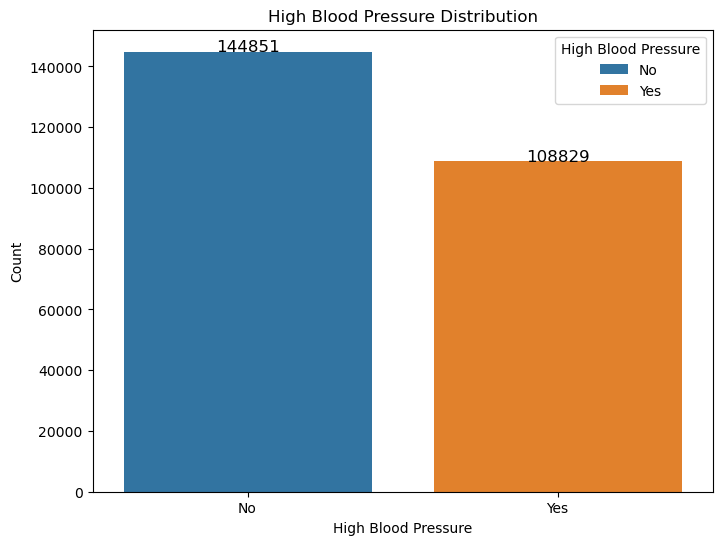

In [411]:
#Countplot for High Blood pressure

# Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HighBP', hue='HighBP', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('High Blood Pressure Distribution')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='High Blood Pressure', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()


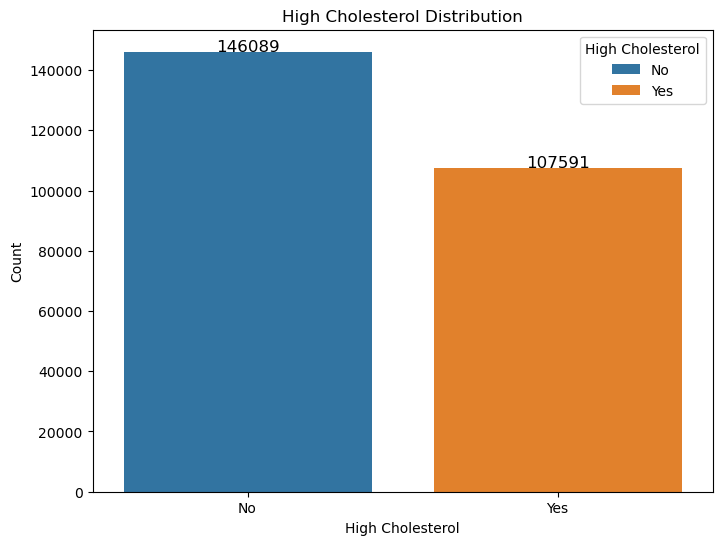

In [412]:
#Countplot for High Cholestrol

# Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HighChol', hue='HighChol', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('High Cholesterol Distribution')
plt.xlabel('High Cholesterol')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='High Cholesterol', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()


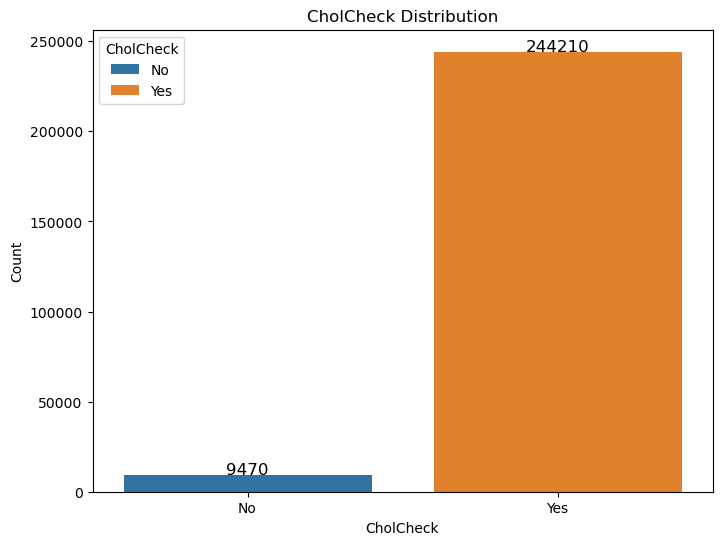

In [413]:
# Countplot for CholCheck

# Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CholCheck', hue='CholCheck', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('CholCheck Distribution')
plt.xlabel('CholCheck')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='CholCheck', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

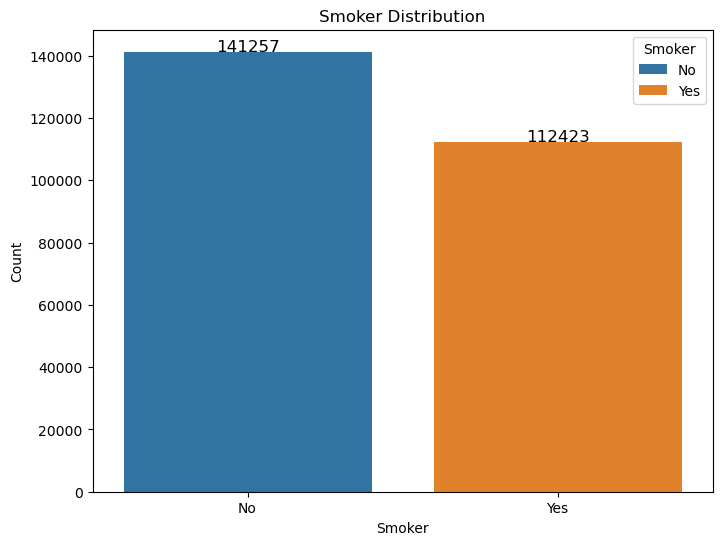

In [414]:
#Countplot for smoker

# Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Smoker', hue='Smoker', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Smoker', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

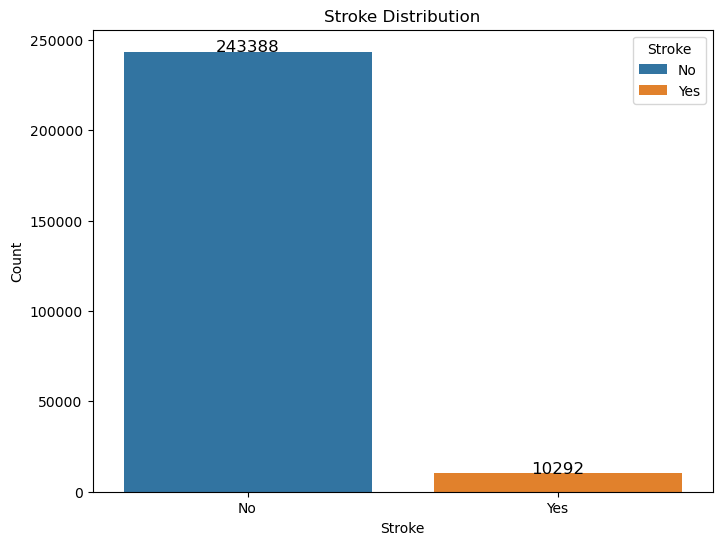

In [415]:
# Countplot for stroke

# Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Stroke', hue='Stroke', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Stroke', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

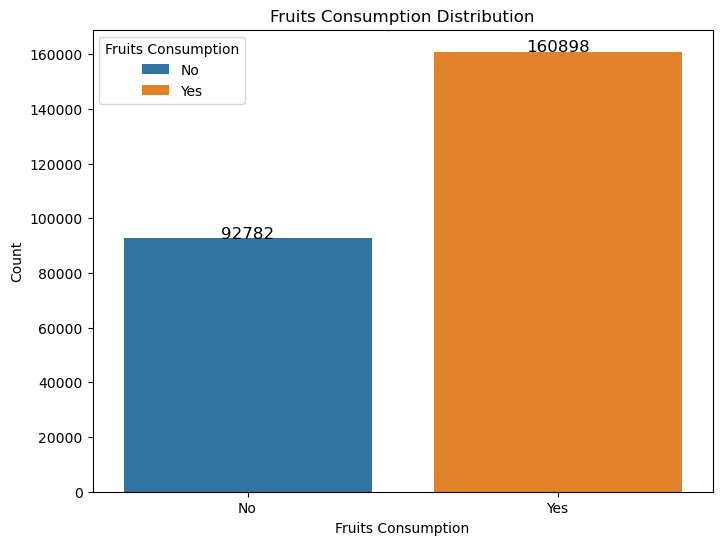

In [416]:
#Countplot for Fruits

#Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Fruits', hue='Fruits', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Fruits Consumption Distribution')
plt.xlabel('Fruits Consumption')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Fruits Consumption', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

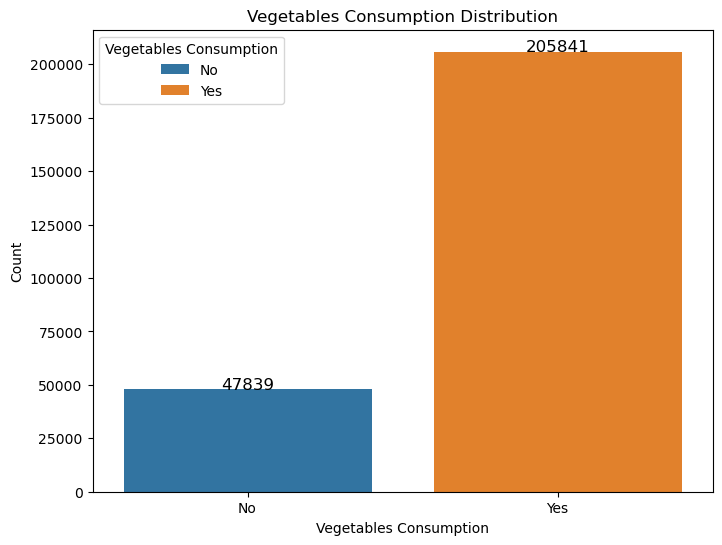

In [417]:
# Countplot for veggies
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Veggies', hue='Veggies', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Vegetables Consumption Distribution')
plt.xlabel('Vegetables Consumption')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Vegetables Consumption', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

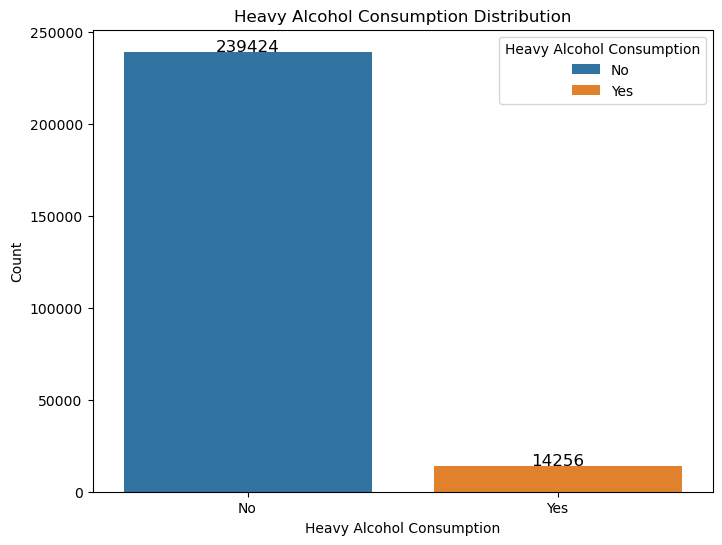

In [418]:
# Countplot for HvyAlcoholConsump

#Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HvyAlcoholConsump', hue='HvyAlcoholConsump', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Heavy Alcohol Consumption Distribution')
plt.xlabel('Heavy Alcohol Consumption')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Heavy Alcohol Consumption', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

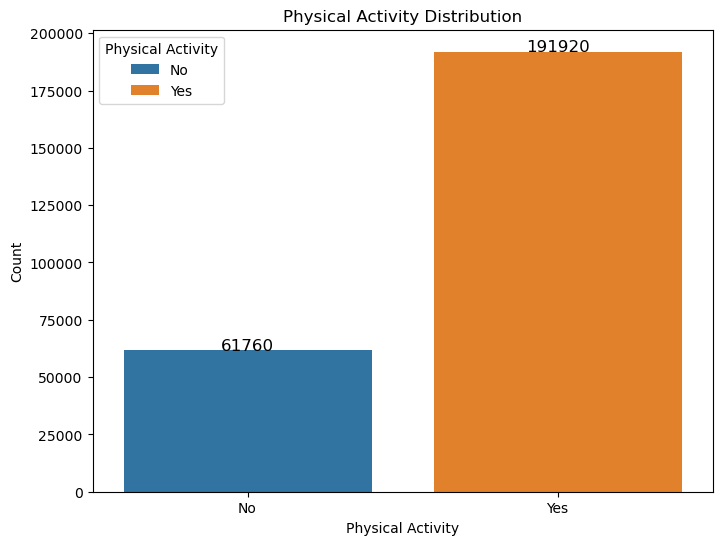

In [419]:
# Countplot for PhysActivity

#Counterplot is created
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='PhysActivity', hue='PhysActivity', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Physical Activity Distribution')
plt.xlabel('Physical Activity')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Physical Activity', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

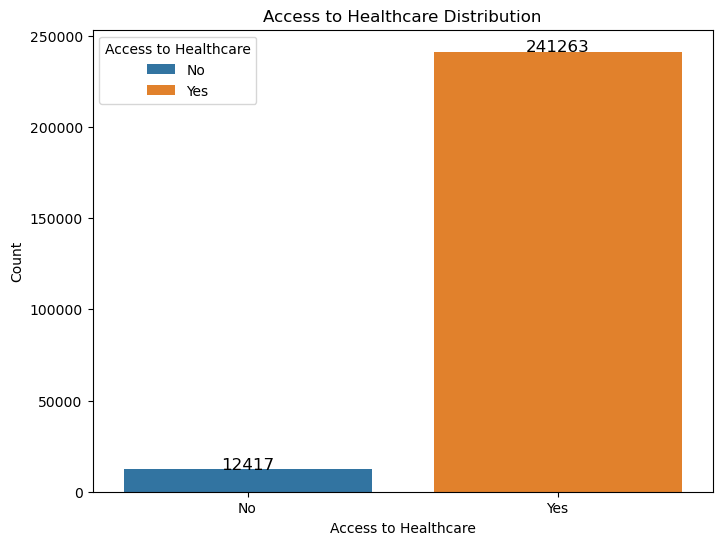

In [420]:
# Countplot for AnyHealthcare
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='AnyHealthcare', hue='AnyHealthcare', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Access to Healthcare Distribution')
plt.xlabel('Access to Healthcare')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Access to Healthcare', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

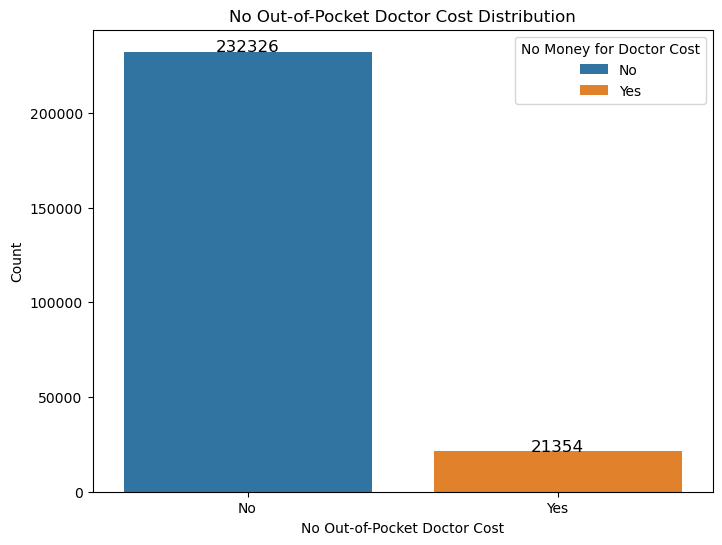

In [421]:
# Countplot for NoDocbcCost
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='NoDocbcCost', hue='NoDocbcCost', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('No Out-of-Pocket Doctor Cost Distribution')
plt.xlabel('No Out-of-Pocket Doctor Cost')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='No Money for Doctor Cost', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

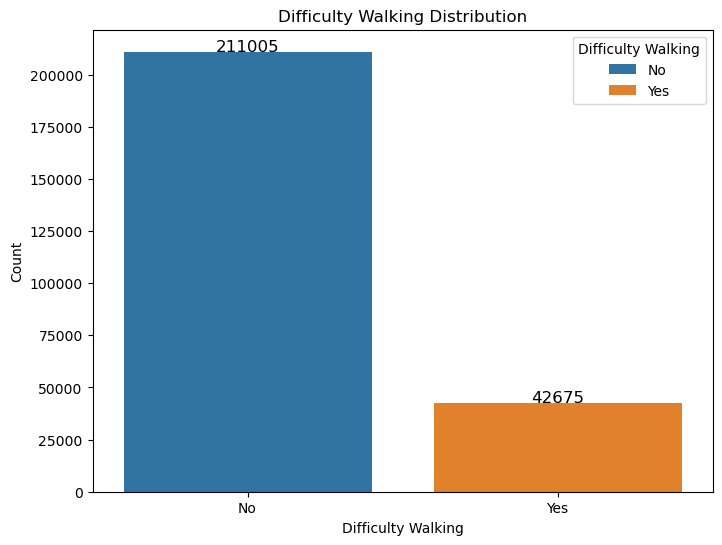

In [422]:
# Countplot for DiffWalk
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='DiffWalk', hue='DiffWalk', dodge=False, data=data3)

# Labels for x-axis and y axis are written
plt.title('Difficulty Walking Distribution')
plt.xlabel('Difficulty Walking')
plt.ylabel('Count')

# Renaming the legend labels
plt.legend(title='Difficulty Walking', labels=['No', 'Yes'])

# Add count labels above non-zero bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

# Replacing x-axis tick labels with 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()

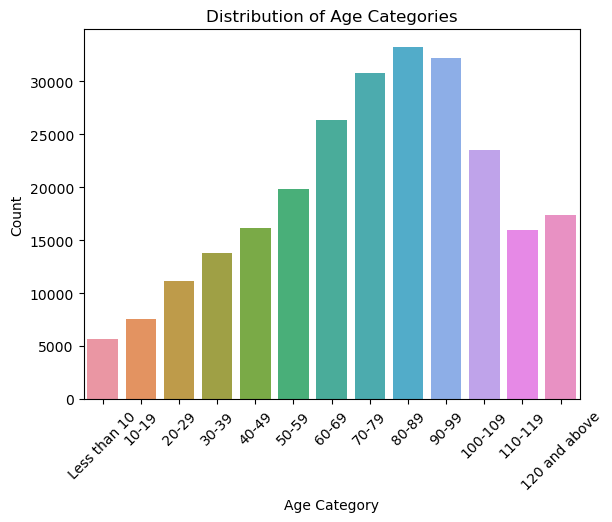

In [423]:
#Age distribution
#Mapping for age categories
age_categories = {
    1: 'Less than 10',
    2: '10-19',
    3: '20-29',
    4: '30-39',
    5: '40-49',
    6: '50-59',
    7: '60-69',
    8: '70-79',
    9: '80-89',
    10: '90-99',
    11: '100-109',
    12: '110-119',
    13: '120 and above'
}

# Labeling the age categories
data3["Age_Label"] = data3["Age"].map(age_categories)

# Sorting the data by age categories
sorted_age_labels = list(age_categories.values())
data3["Age_Label"] = pd.Categorical(data3["Age_Label"], categories=sorted_age_labels, ordered=True)

# Bar Chart: Distribution of Age Categories (in order of age)
sns.countplot(x="Age_Label", data=data3, order=sorted_age_labels)
plt.title("Distribution of Age Categories")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Drop the "Age_Label" column so it doesn't affect the other parts of the code
data3.drop("Age_Label", axis=1, inplace=True)


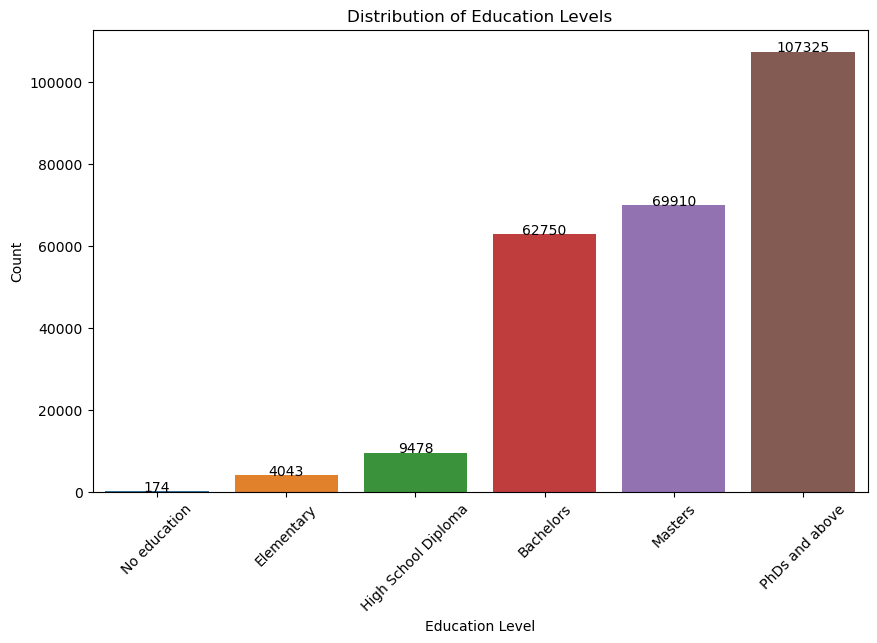

In [424]:
#Education levels
#Mapping for education levels
education_mapping = {
    1: 'No education',
    2: 'Elementary',
    3: 'High School Diploma',
    4: 'Bachelors',
    5: 'Masters',
    6: 'PhDs and above'
}

# Labeling the education levels
data3["Education_Label"] = data3["Education"].map(education_mapping)

# Sorting the data by education levels
sorted_education_labels = list(education_mapping.values())
data3["Education_Label"] = pd.Categorical(data3["Education_Label"], categories=sorted_education_labels, ordered=True)

# The bar graph is created 
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Education_Label", data=data3, order=sorted_education_labels)
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Label the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

# Drop the "Education_Label" column so it doesn't affect the other parts of the code
data3.drop("Education_Label", axis=1, inplace=True)


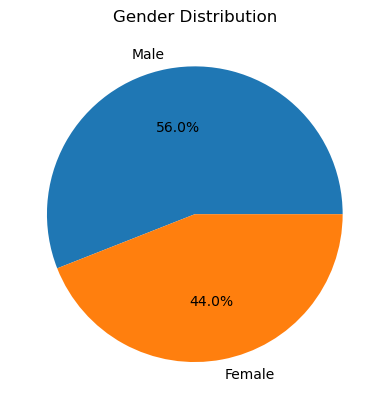

In [425]:
#Pie chart for gender
gender_counts = data3["Sex"].value_counts()
plt.pie(gender_counts, labels=["Male", "Female"], autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()


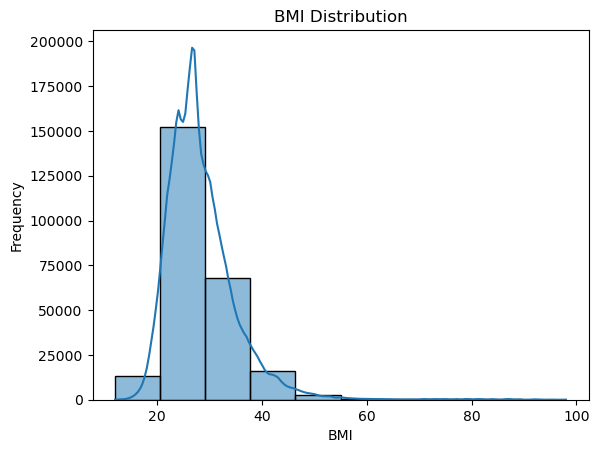

In [426]:
#Histrogram histogram for BMI
sns.histplot(data3["BMI"], bins=10, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

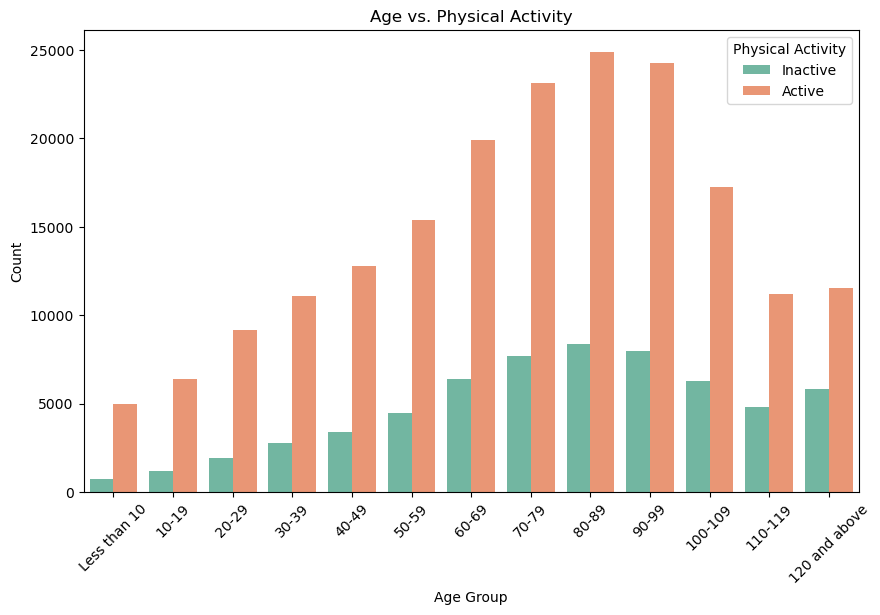

In [427]:
#Age vs Physical Activity 
# Mapping for age categories
age_mapping = {
    1: 'Less than 10',
    2: '10-19',
    3: '20-29',
    4: '30-39',
    5: '40-49',
    6: '50-59',
    7: '60-69',
    8: '70-79',
    9: '80-89',
    10: '90-99',
    11: '100-109',
    12: '110-119',
    13: '120 and above'
}

# Labeling the age groups
data3["Age_Label"] = data3["Age"].map(age_mapping)

# Sort the data by age labels
sorted_age_labels = list(age_mapping.values())
data3["Age_Label"] = pd.Categorical(data3["Age_Label"], categories=sorted_age_labels, ordered=True)
data3.sort_values("Age_Label", inplace=True)

# Counterplot for Age vs Physical Activity
plt.figure(figsize=(10, 6))
sns.countplot(x="Age_Label", hue="PhysActivity", data=data3, palette="Set2")
plt.title("Age vs. Physical Activity")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Physical Activity", labels=["Inactive", "Active"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Drop the "Age_Label" column so it doesn't affect the other parts of the code
data3.drop("Age_Label", axis=1, inplace=True)

plt.show()


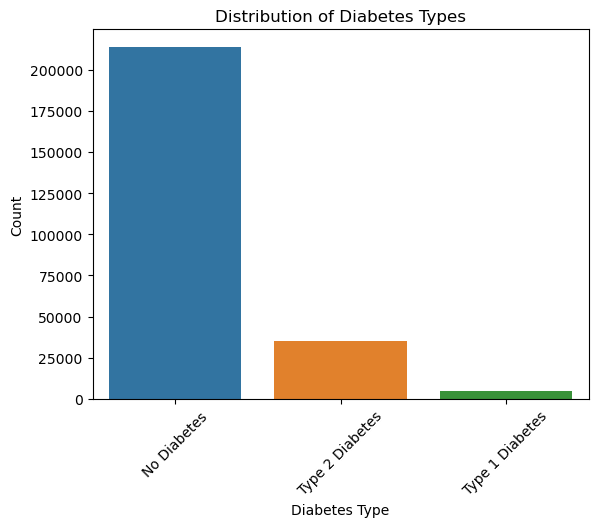

In [428]:
#Counterplot fot Diabetes type
# Labeling the the diabetes types
data3["Diabetes_Label"] = data3["Diabetes"].map({0: "No Diabetes", 1: "Type 1 Diabetes", 2: "Type 2 Diabetes"})

# Bar Chart: Distribution of Diabetes Types
sns.countplot(x="Diabetes_Label", data=data3)
plt.title("Distribution of Diabetes Types")
plt.xlabel("Diabetes Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Dropping it so it doesnt affect the other ones
data3.drop("Diabetes_Label", axis=1, inplace=True)

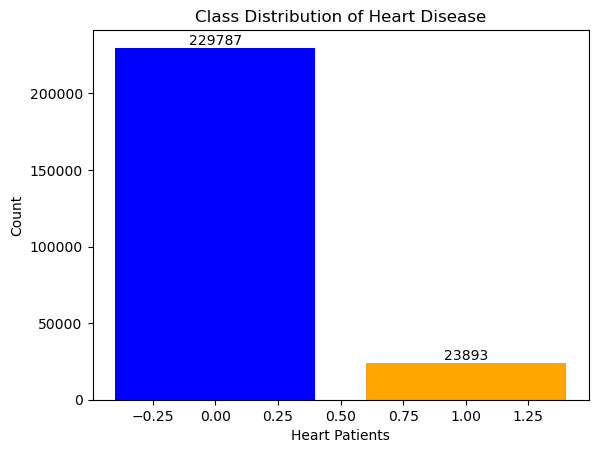

In [429]:
#Checking Class imbalance

# The target variable HeartdiseaseorAttack occurances is been counted
class_counts = data3['Target'].value_counts()

# The bar graph is plotted
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Heart Patients')
plt.ylabel('Count')
plt.title('Class Distribution of Heart Disease')

# Label the bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)  # To keep the class names on the x-axis horizontal
plt.show()


Class Distribution Before Oversampling:
Target
0.0    229787
1.0     23893
Name: count, dtype: int64

Class Distribution After Oversampling:
Target
0.0    229787
1.0    229787
Name: count, dtype: int64


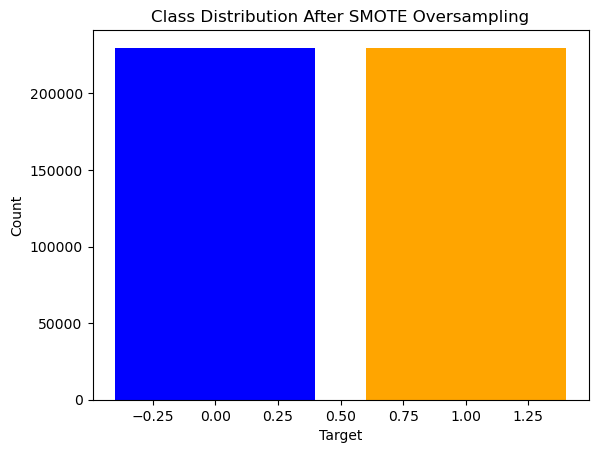

In [430]:
#Doing Oversampling to remove imbalancing
# Separate the target variable from the features
X = data3.drop('Target', axis=1)
y = data3['Target']

# Instantiate SMOTE with desired parameters
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Target'] = y_resampled

# Display class distribution before and after oversampling
class_counts_before = y.value_counts()
class_counts_after = y_resampled.value_counts()

print("\nClass Distribution Before Oversampling:")
print(class_counts_before)

print("\nClass Distribution After Oversampling:")
print(class_counts_after)

# Plotting it again after oversampling
plt.bar(class_counts_after.index, class_counts_after.values, color=['blue', 'orange'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE Oversampling')
plt.xticks(rotation=0)
plt.show()




In [431]:
#Saving the the resampled file by the name of data4
data4 = resampled_data.copy()
print(data4.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  PhysActivity  \
0     0.0       0.0        1.0  22.0     0.0     0.0       0.0           1.0   
1     0.0       0.0        1.0  20.0     0.0     0.0       0.0           0.0   
2     0.0       1.0        1.0  24.0     0.0     0.0       0.0           1.0   
3     0.0       0.0        1.0  34.0     0.0     0.0       2.0           1.0   
4     0.0       1.0        1.0  27.0     0.0     0.0       0.0           1.0   

   Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  \
0     0.0      1.0                0.0            0.0          0.0      3.0   
1     1.0      0.0                0.0            1.0          0.0      1.0   
2     0.0      0.0                0.0            0.0          0.0      4.0   
3     0.0      0.0                0.0            1.0          0.0      2.0   
4     1.0      1.0                0.0            1.0          1.0      4.0   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Educati

# Feature Selection

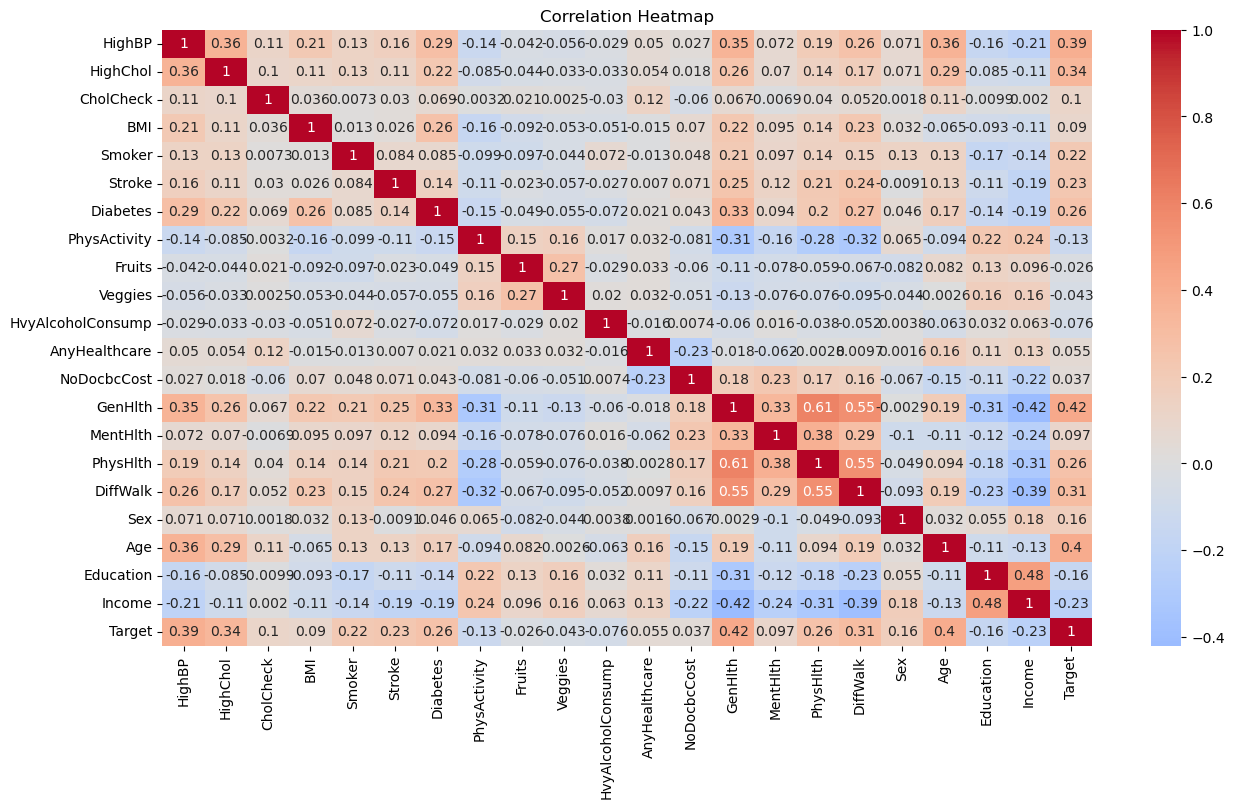

In [432]:
#Feature selection

# The correlation matrix is calculated
correlation_matrix = data4.corr()

# Setting the figure size
plt.figure(figsize=(15, 8))

# Creating a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Showing the plot
plt.title('Correlation Heatmap')
plt.show()

In [433]:
#Feature Scaling and Splitting data
# Separating the target varaible from features
X = data4.drop('Target', axis=1)
y = data4['Target']

#StandardScaler is been applied to normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# The data is split into 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Printing the shape of training and test data
print("The shape of X_train:", X_train.shape)
print("The shape of X_test:", X_test.shape)
print("The shape of y_train:", y_train.shape)
print("The shape of y_test:", y_test.shape)


The shape of X_train: (367659, 21)
The shape of X_test: (91915, 21)
The shape of y_train: (367659,)
The shape of y_test: (91915,)


# Model Building

Accuracy of Decision Tree Classifier before tuning: 91.51%
The Classification Report of Decision:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     45918
         1.0       0.91      0.92      0.92     45997

    accuracy                           0.92     91915
   macro avg       0.92      0.92      0.92     91915
weighted avg       0.92      0.92      0.92     91915



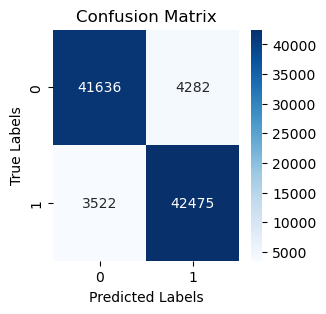

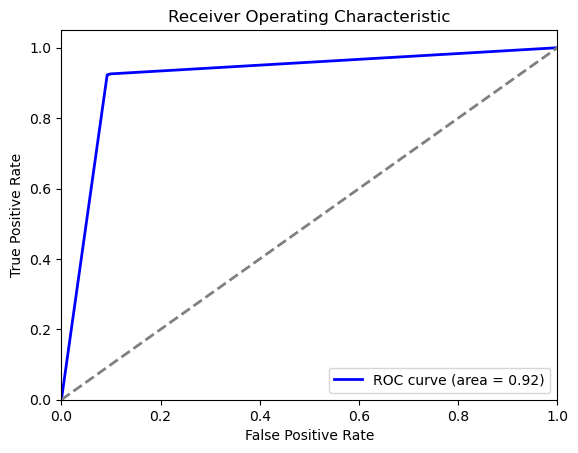

In [434]:
#Decision Tree

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 
                     'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected ]
y = data4['Target']


# The decision tree classifier is created
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

#The prediction is done on test data
pred_y = clf.predict(X_test)

#The accuracy is calculated
accuracy = accuracy_score(y_test, pred_y)

#Printing,converting and rounding to 2 decimel places
print("Accuracy of Decision Tree Classifier before tuning: {}%".format(round(accuracy * 100, 2)))

# Developing Classification report
report_class = classification_report(y_test, pred_y)
print("The Classification Report of Decision:\n", report_class)

# Creating a confusion matrix
cf_matrix = confusion_matrix(y_test,pred_y)

# Seaborn library is used to plot the confusion matrix
plt.figure(figsize=(3, 3)) # Figure size is set 
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues') #the colr is set to Blues
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# The ROC curve is made and AUC is calculated
n_classes = 2
test_bin_y = label_binarize(y_test, classes=[0, 1])
pred_prob_y = clf.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(test_bin_y, pred_prob_y)
roc_auc = auc(fpr, tpr)

# The ROc curve is plotted
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc) #The color is set to blue
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') #The AUC line is plotted
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy of Random Forest Classifier before tuning: 94.77%
The Classification Report of Random Forest:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     45918
         1.0       0.98      0.92      0.95     45997

    accuracy                           0.95     91915
   macro avg       0.95      0.95      0.95     91915
weighted avg       0.95      0.95      0.95     91915



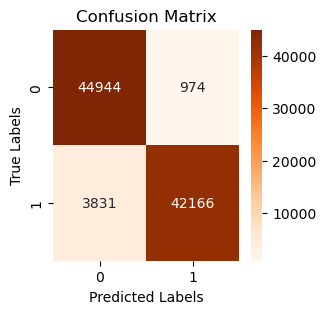

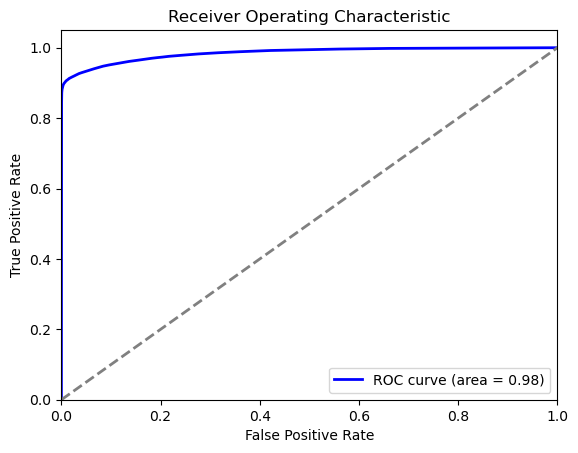

In [435]:
#Random Forest

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 
                     'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected]
y = data4['Target']

# The random forest classifier is created
clf2 = RandomForestClassifier(random_state=1)
clf2.fit(X_train, y_train)

#The prediction is done on test data
pred_y = clf2.predict(X_test)

#The accuracy is calculated
accuracy = accuracy_score(y_test,pred_y)

#Printing,converting and rounding to 2 decimel places
print("Accuracy of Random Forest Classifier before tuning: {}%".format(round(accuracy * 100, 2)))

# Developing Classification report
report_class2 = classification_report(y_test, pred_y)
print("The Classification Report of Random Forest:\n", report_class2)

# Creating a confusion matrix
cf_matrix2 = confusion_matrix(y_test,pred_y)

# Seaborn library is used to plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix2, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#The ROC curve is made and AUC is calculated
n_classes = 2
test_bin_y = label_binarize(y_test, classes=[0, 1])
pred_prob_y = clf2.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(test_bin_y, pred_prob_y)
roc_auc = auc(fpr, tpr)

# The ROC curve is plotted
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy of Logistic Regression before tuning: 77.87%
The Classification Report of Logistic regression:
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77     45918
         1.0       0.76      0.81      0.78     45997

    accuracy                           0.78     91915
   macro avg       0.78      0.78      0.78     91915
weighted avg       0.78      0.78      0.78     91915



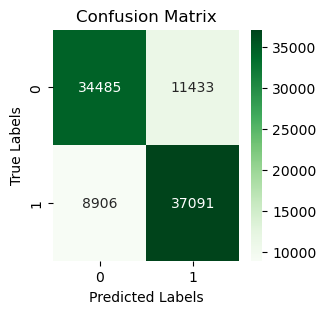

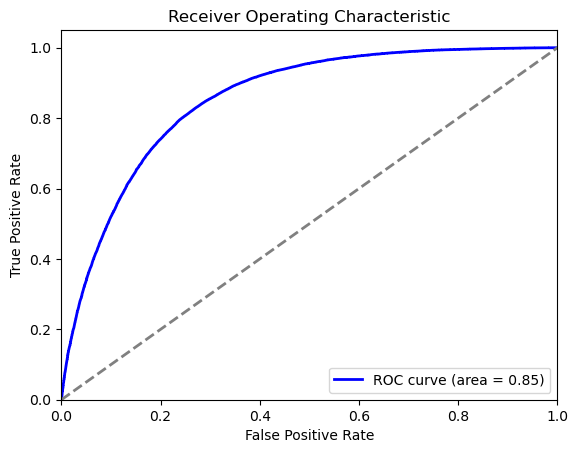

In [436]:
#Logistics regression
import warnings
warnings.filterwarnings("ignore")

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 
                     'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected]
y = data4['Target']

# The logistic rgeression is created 
clf3 = LogisticRegression(random_state=1)
clf3.fit(X_train, y_train)

#The prediction is done on test data
pred_y = clf3.predict(X_test)

#Printing,converting and rounding to 2 decimel places
accuracy = accuracy_score(y_test,pred_y)
print("Accuracy of Logistic Regression before tuning: {}%".format(round(accuracy * 100, 2)))

# Developing Classification report
report_class3 = classification_report(y_test, pred_y)
print("The Classification Report of Logistic regression:\n", report_class3)

# Creating a confusion matrix
cf_matrix3 = confusion_matrix(y_test,pred_y)

# Seaborn library is used to plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix3, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#The ROC curve is made and AUC is calculated
n_classes = 2
test_bin_y = label_binarize(y_test, classes=[0, 1])
pred_prob_y = clf3.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(test_bin_y,pred_prob_y)
roc_auc = auc(fpr, tpr)

#The ROC curve is plotted
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy of XGBoost before tuning: 94.7%
The Classification Report of XGBoost:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45918
         1.0       0.99      0.91      0.94     45997

    accuracy                           0.95     91915
   macro avg       0.95      0.95      0.95     91915
weighted avg       0.95      0.95      0.95     91915



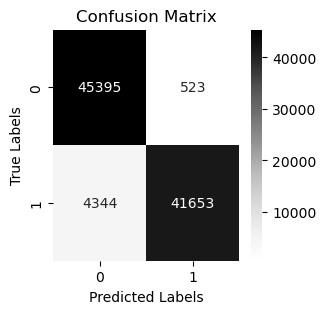

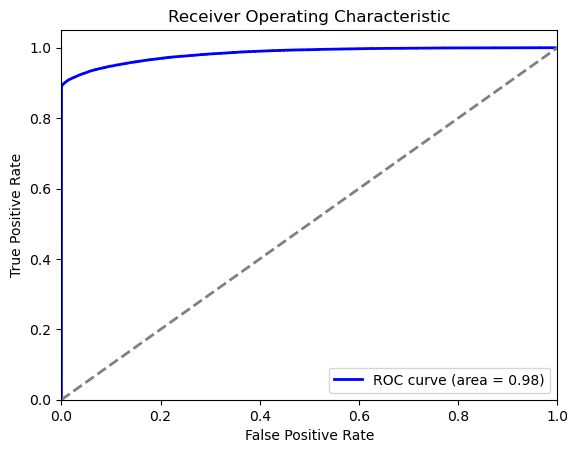

In [437]:
#XGBoost

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 
                     'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected]
y = data4['Target']

# The XGBoost classifier is created 
clf4 = XGBClassifier(random_state=1)
clf4.fit(X_train, y_train)

#The prediction is done on test data
pred_y = clf4.predict(X_test)

#Printing,converting and rounding to 2 decimel places
accuracy = accuracy_score(y_test, pred_y)
print("Accuracy of XGBoost before tuning: {}%".format(round(accuracy * 100, 2)))

# Developing Classification report
report_class4 = classification_report(y_test, pred_y)
print("The Classification Report of XGBoost:\n", report_class4)

# Creating a confusion matrix
cf_matrix4 = confusion_matrix(y_test,pred_y)

# Seaborn library is used to plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix4, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#The ROC curve is made and AUC is calculated
n_classes = 2
test_bin_y = label_binarize(y_test, classes=[0, 1])
pred_prob_y = clf4.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(test_bin_y, pred_prob_y)
roc_auc = auc(fpr, tpr)

#The ROC curve is plotted
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy of Naive Bayes before tuning: 73.52%
The Classification Report of Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.71      0.79      0.75     45918
         1.0       0.76      0.68      0.72     45997

    accuracy                           0.74     91915
   macro avg       0.74      0.74      0.73     91915
weighted avg       0.74      0.74      0.73     91915



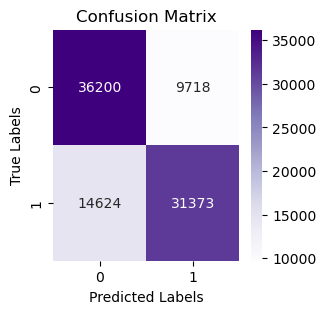

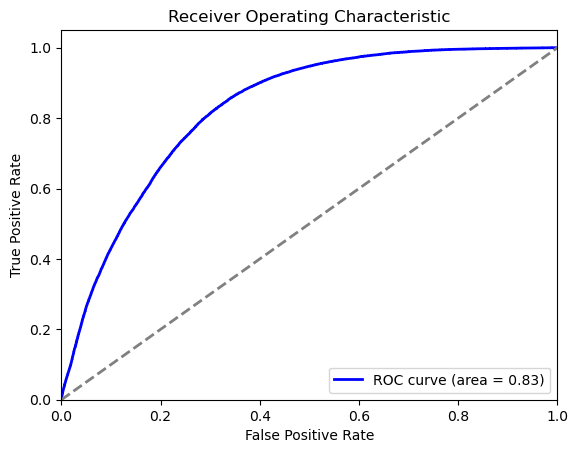

In [438]:
#Naive Bayes

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 
                     'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected]
y = data4['Target']

# Split the data into 80/20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#The Gaussian Naive Bayes classifier is created 
clf5 = GaussianNB()
clf5.fit(X_train, y_train)

# Predict on the test set
pred_y = clf5.predict(X_test)

#Printing,converting and rounding to 2 decimel places
accuracy = accuracy_score(y_test, pred_y)
print("Accuracy of Naive Bayes before tuning: {}%".format(round(accuracy * 100, 2)))

# Developing Classification report
report_class5 = classification_report(y_test, pred_y)
print("The Classification Report of Naive Bayes:\n", report_class5)

# Creating a confusion matrix
cf_matrix5 = confusion_matrix(y_test,pred_y)

# Seaborn library is used to plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix5, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#The ROC curve is made and AUC is calculated
n_classes = 2
test_bin_y = label_binarize(y_test, classes=[0, 1])
pred_prob_y = clf5.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(test_bin_y, pred_prob_y)
roc_auc = auc(fpr, tpr)

#The ROC curve is plotted
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Evaluation of Models before tuning

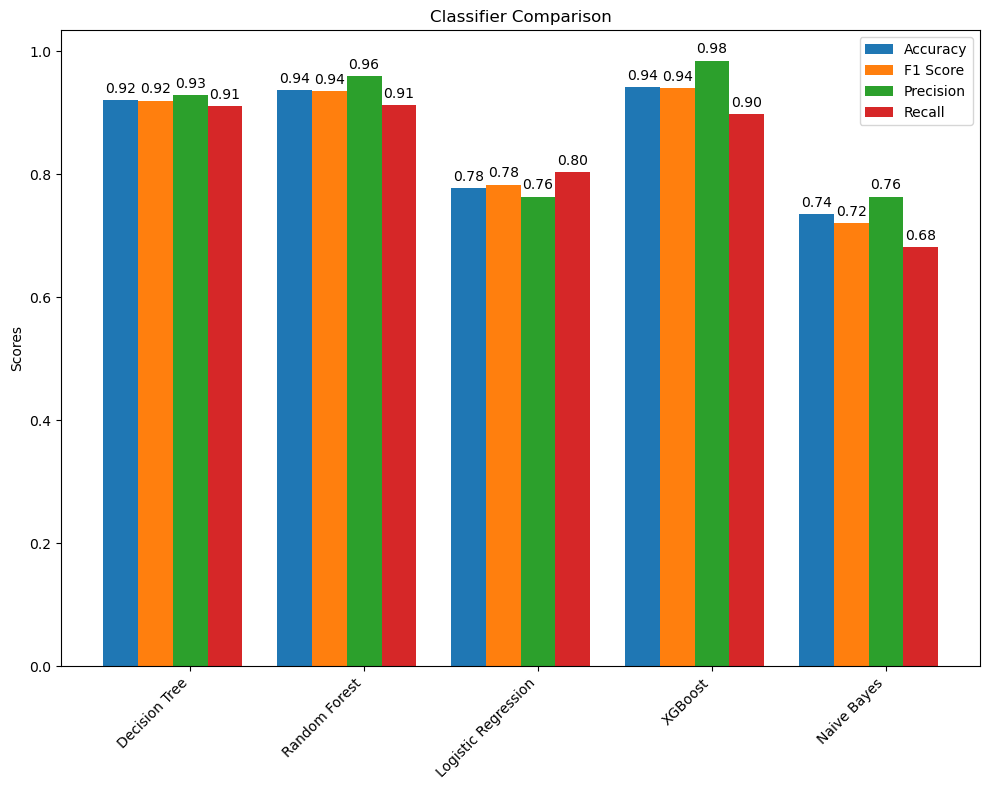

In [439]:
#Model Comparision before tuning

# Initialize and train classifiers
classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("Logistic Regression", LogisticRegression(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1)),
    ("Naive Bayes", GaussianNB())
]

results = {"Classifier": [], "Accuracy": [], "F1 Score": [], "Precision": [], "Recall": []}

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results["Classifier"].append(name)
    results["Accuracy"].append(accuracy)
    results["F1 Score"].append(f1)
    results["Precision"].append(precision)
    results["Recall"].append(recall)

# Create a bar chart to display the results with an extended size
labels = results["Classifier"]
accuracy_scores = results["Accuracy"]
f1_scores = results["F1 Score"]
precision_scores = results["Precision"]
recall_scores = results["Recall"]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x, f1_scores, width, label='F1 Score')
rects3 = ax.bar(x + width, precision_scores, width, label='Precision')
rects4 = ax.bar(x + 2 * width, recall_scores, width, label='Recall')

ax.set_ylabel('Scores')
ax.set_title('Classifier Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Annotate bars with numeric values (adjusted label placement)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


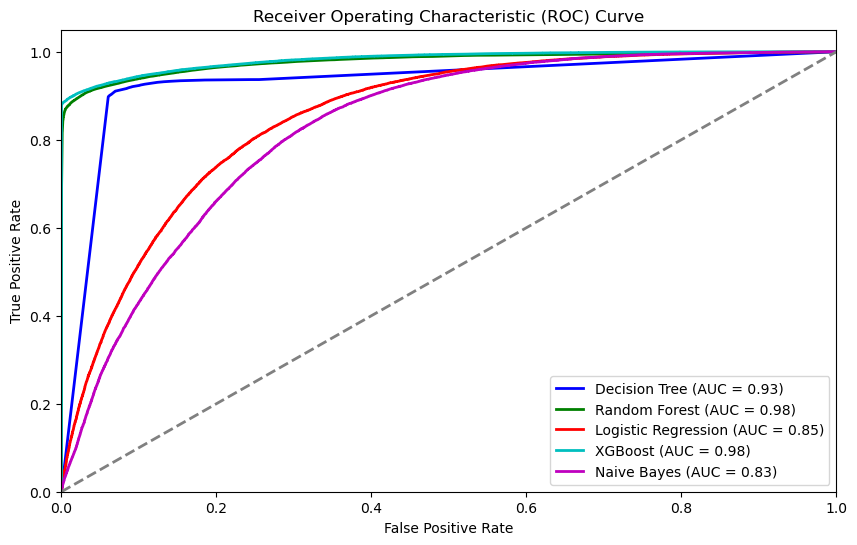

In [440]:
#ROC-AUC curve comparision for all the five models before tuning

# Initialize and train classifiers
classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("Logistic Regression", LogisticRegression(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1)),
    ("Naive Bayes", GaussianNB())
]

# Initialize colors for the ROC curves
colors = ['b', 'g', 'r', 'c', 'm']

#Setting up the figure
plt.figure(figsize=(10, 6)) 

# ROC curve for each classifier is plotted
for i, (name, clf) in enumerate(classifiers):
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Hyperparameter tuning

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
Accuracy of Decision Tree Classifier: 92.69%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     45918
         1.0       0.95      0.90      0.93     45997

    accuracy                           0.93     91915
   macro avg       0.93      0.93      0.93     91915
weighted avg       0.93      0.93      0.93     91915



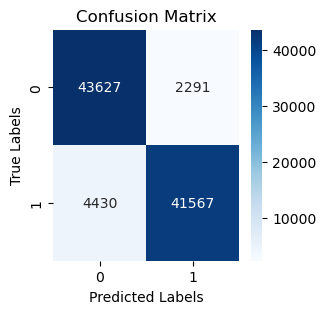

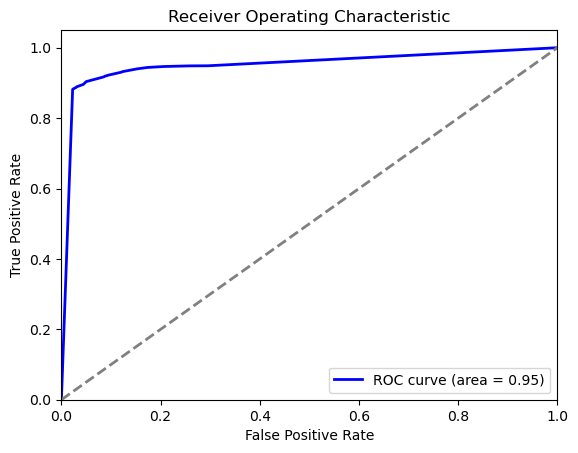

In [441]:
#Decision tree

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 
                     'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected ]
y = data4['Target']

# The parameters for decision tree is set
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

DT_classifier = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator=DT_classifier, param_distributions=parameters, n_iter=20,
                                   scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_DT_classifier = random_search.best_estimator_

# Predict on the test set
y_pred = best_DT_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier: {}%".format(round(accuracy * 100, 2)))

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve and calculate AUC
n_classes = 2
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = best_DT_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Accuracy of Random Forest Classifier: 94.05%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     45918
         1.0       0.97      0.91      0.94     45997

    accuracy                           0.94     91915
   macro avg       0.94      0.94      0.94     91915
weighted avg       0.94      0.94      0.94     91915



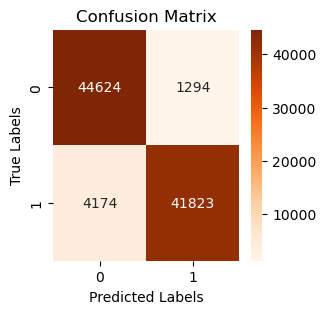

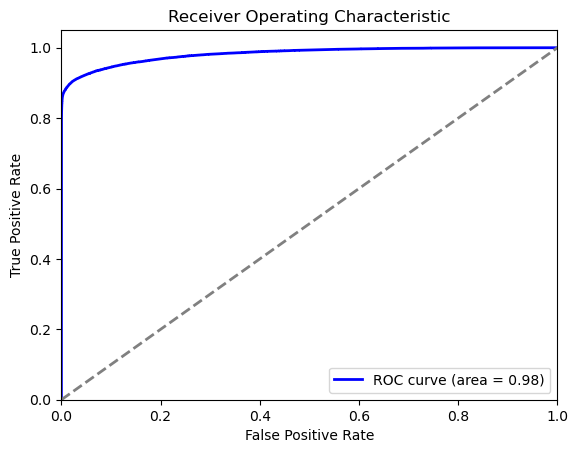

In [442]:
# Random Forest
#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 
                     'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected ]
y = data4['Target']

# Splitting the data into training and test data using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Parameters for tuning Random Forest
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

RF_classifier = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=RF_classifier, param_distributions=parameters, n_iter=20,
                                   scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_RF_classifier = random_search.best_estimator_

# Predict on the test set
y_pred = best_RF_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier: {}%".format(round(accuracy * 100, 2)))

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve and calculate AUC
n_classes = 2
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = best_RF_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 25, 'C': 1.0}
Accuracy of Logistic Regression Classifier: 77.74%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77     45918
         1.0       0.76      0.80      0.78     45997

    accuracy                           0.78     91915
   macro avg       0.78      0.78      0.78     91915
weighted avg       0.78      0.78      0.78     91915



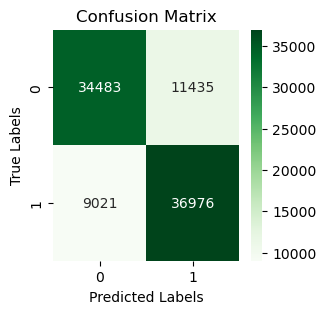

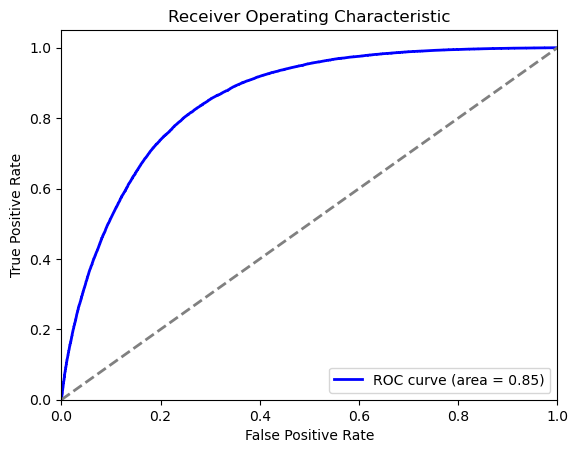

In [443]:
# Logistic Regression

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 
                     'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected ]
y = data4['Target']

# Parameters for tuning Logistic Regression
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [1.0, 2.5, 4.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [25, 50, 100]
}

LR_classifier = LogisticRegression()
random_search = RandomizedSearchCV(estimator=LR_classifier, param_distributions=parameters, n_iter=20,
                                   scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_LR_classifier = random_search.best_estimator_

# Predict on the test set
y_pred = best_LR_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy * 100, 2)))

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve and calculate AUC
n_classes = 2
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = best_LR_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters: {'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2}
Accuracy of XGBoost Classifier: 94.24%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.94     45918
         1.0       0.98      0.90      0.94     45997

    accuracy                           0.94     91915
   macro avg       0.95      0.94      0.94     91915
weighted avg       0.95      0.94      0.94     91915



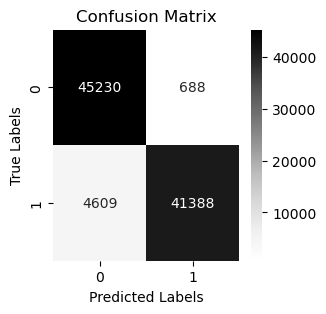

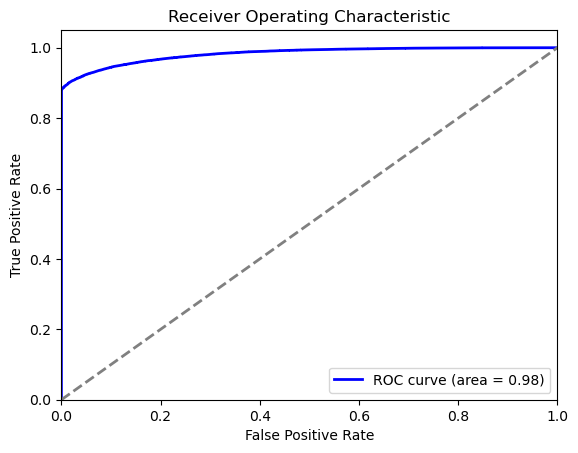

In [444]:
# XGBoost

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 
                     'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected ]
y = data4['Target']

# Parameters for tuning XGBoost
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2]
}

XGB_classifier = XGBClassifier(random_state=1)
random_search = RandomizedSearchCV(estimator=XGB_classifier, param_distributions=parameters, n_iter=20,
                                   scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_XGB_classifier = random_search.best_estimator_

# Predict on the test set
y_pred = best_XGB_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of XGBoost Classifier: {}%".format(round(accuracy * 100, 2)))

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve and calculate AUC
n_classes = 2
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = best_XGB_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Feature Importance for XGBoost Classifier:
         Feature  Importance
0         HighBP    0.326234
1       HighChol    0.165494
9            Sex    0.088117
2         Smoker    0.084398
6        GenHlth    0.068601
3         Stroke    0.056998
5   PhysActivity    0.054473
10           Age    0.046554
8       DiffWalk    0.043970
11     Education    0.032186
12        Income    0.020410
4       Diabetes    0.007357
7       PhysHlth    0.005208


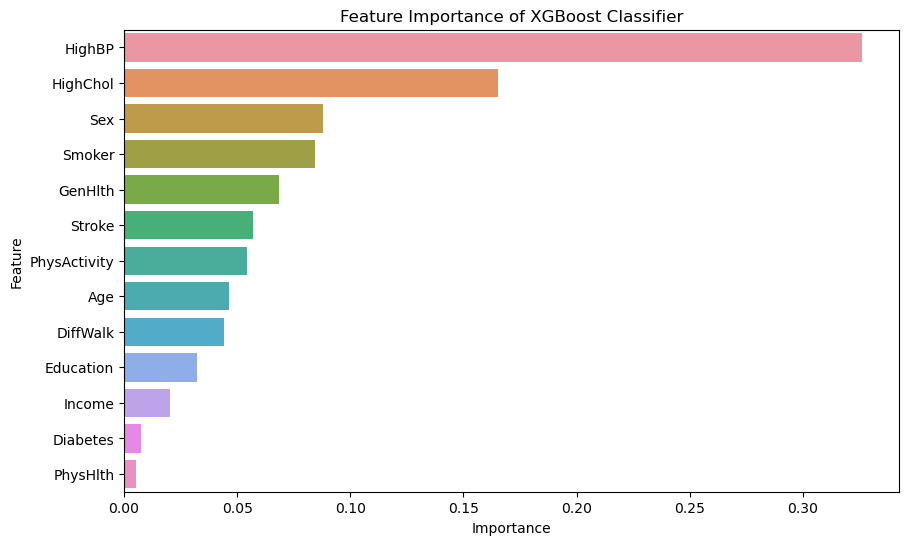

In [445]:
#Feature importance for XGBoost
# Getting feature importances for XGBoost classifier
feature_importances_xgb = best_XGB_classifier.feature_importances_

# Creating a DataFrame to store feature names and their importances
feature_importance_xgb = pd.DataFrame({'Feature': features_selected, 'Importance': feature_importances_xgb})

# Sorting the features by importance in descending order
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Printing the feature importance
print("Feature Importance for XGBoost Classifier:")
print(feature_importance_xgb)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb)
plt.title('Feature Importance of XGBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Best Hyperparameters: {'var_smoothing': 0.0006579332246575676}
Accuracy of Naive Bayes Classifier: 73.67%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.77      0.75     45918
         1.0       0.76      0.70      0.73     45997

    accuracy                           0.74     91915
   macro avg       0.74      0.74      0.74     91915
weighted avg       0.74      0.74      0.74     91915



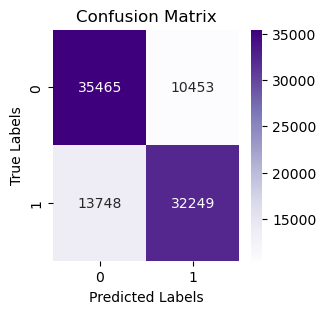

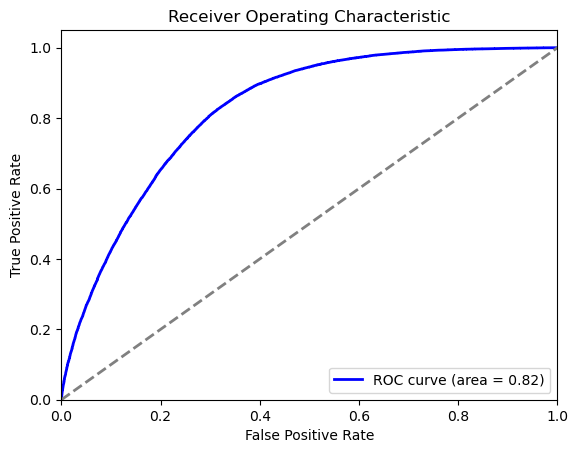

In [446]:
# Naive Bayes

#The important features are selected after feature selection
features_selected = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'GenHlth', 
                     'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

X = data4[features_selected ]
y = data4['Target']

# Hyperparameter tuning for Naive Bayes
parameters = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

NB_classifier = GaussianNB()
random_search = RandomizedSearchCV(estimator=NB_classifier, param_distributions=parameters, n_iter=20,
                                   scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_NB_classifier = random_search.best_estimator_

# Predict on the test set
y_pred = best_NB_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy * 100, 2)))

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve and calculate AUC
n_classes = 2
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = best_NB_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, roc_auc = {}, {}, {}
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


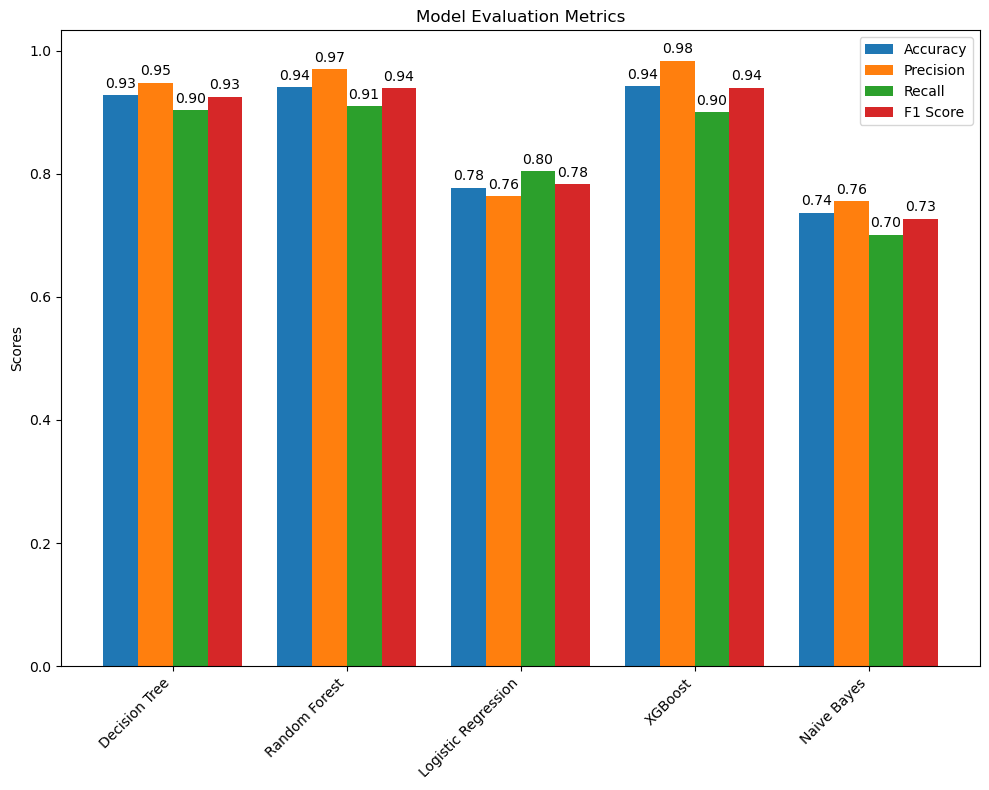

In [447]:
#Model all in ones

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize classifiers with best hyperparameters
classifiers = [
    ("Decision Tree", best_DT_classifier),
    ("Random Forest", best_RF_classifier),
    ("Logistic Regression", best_LR_classifier),
    ("XGBoost", best_XGB_classifier),
    ("Naive Bayes", best_NB_classifier)
]

# Define a list to store the results
results = []

# Initialize and train classifiers
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    results.append((name, accuracy, precision, recall, f1))

# Extract the metrics
names, accuracies, precisions, recalls, f1_scores = zip(*results)

# Create a bar chart to display the results
x = np.arange(len(names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
rects1 = ax.bar(x - 1.5 * width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precisions, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recalls, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1_scores, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45, ha="right")
ax.legend()

# Label the values on the bars
def label_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Display with 2 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

label_bars(rects1)
label_bars(rects2)
label_bars(rects3)
label_bars(rects4)

fig.tight_layout()
plt.show()


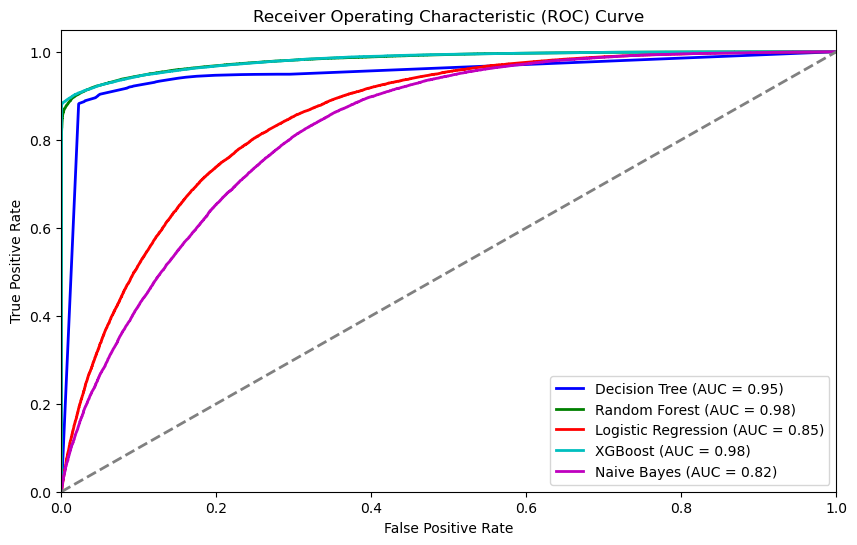

In [448]:
#AUC-ROC curves for all models 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize classifiers with best hyperparameters
classifiers = [
    ("Decision Tree", best_DT_classifier),
    ("Random Forest", best_RF_classifier),
    ("Logistic Regression", best_LR_classifier),
    ("XGBoost", best_XGB_classifier),
    ("Naive Bayes", best_NB_classifier)
]

# Initialize colors for the ROC curves
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot ROC curve for each classifier
for i, (name, clf) in enumerate(classifiers):
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


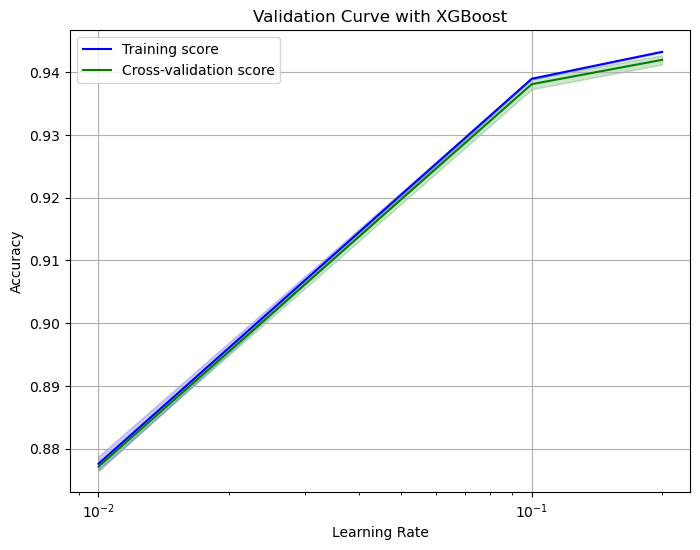

In [449]:
#Validation curve

# Define the range of values to test for a specific hyperparameter learning_rate
param_range = [0.01, 0.1, 0.2]

# Create a validation curve for the learning rate
train_scores, test_scores = validation_curve(
    XGBClassifier(random_state=1),
    X_train, y_train,
    param_name="learning_rate",
    param_range=param_range,
    cv=5,  # Number of cross-validation folds
    scoring="accuracy",  # Use accuracy as the scoring metric
    n_jobs=-1  # Use all available CPU cores 
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.title("Validation Curve with XGBoost")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.semilogx(param_range, train_scores_mean, label="Training score", color="b")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.grid()
plt.show()


In [450]:
#Log loss
# theXGboost is fiited iwth training data
best_XGB_classifier.fit(X_train, y_train)

# The log loss for training test is calculated
y_train_prob = best_XGB_classifier.predict_proba(X_train)
train_log_loss = log_loss(y_train, y_train_prob)
print("Log Loss on Training Data:", train_log_loss)

# The log loss for test data is calculated
y_test_prob = best_XGB_classifier.predict_proba(X_test)
test_log_loss = log_loss(y_test, y_test_prob)
print("Log Loss on Test Data:", test_log_loss)


Log Loss on Training Data: 0.1391634522005028
Log Loss on Test Data: 0.14501352243568078


In [451]:
#Checking Actual vs predicted
# Based on test data it is predicted 
y_test_pred = best_XGB_classifier.predict(X_test)

# The first 20 records are printed
print("Actual vs. Predicted Values on Test Data :")
for actual, predicted in zip(y_test[:20], y_test_pred[:20]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs. Predicted Values on Test Data :
Actual: 0.0, Predicted: 0
Actual: 1.0, Predicted: 1
Actual: 1.0, Predicted: 1
Actual: 1.0, Predicted: 1
Actual: 1.0, Predicted: 1
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0
Actual: 1.0, Predicted: 1
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0
Actual: 1.0, Predicted: 1
Actual: 0.0, Predicted: 1
Actual: 1.0, Predicted: 1
Actual: 1.0, Predicted: 0
Actual: 1.0, Predicted: 1
Actual: 1.0, Predicted: 1
Actual: 1.0, Predicted: 1


# Deployment

In [452]:
#Using pickle to saved the data

#Chose XGboost as best model after evaluation
best_XGB_classifier = random_search.best_estimator_

# Saving the XGBOOST using pickle
with open('xgboost_best_model.pkl', 'wb') as d:
    pickle.dump(best_XGB_classifier, d)
print("The model has been saved.")


The model has been saved.
